In [2]:
import diplib as dp
import cv2
import numpy as np
import matplotlib.pyplot as plt
from inpaint import in_paint_alg

DIPlib -- a quantitative image analysis library
Version 3.4.3 (Mar 21 2024)
For more information see https://diplib.org


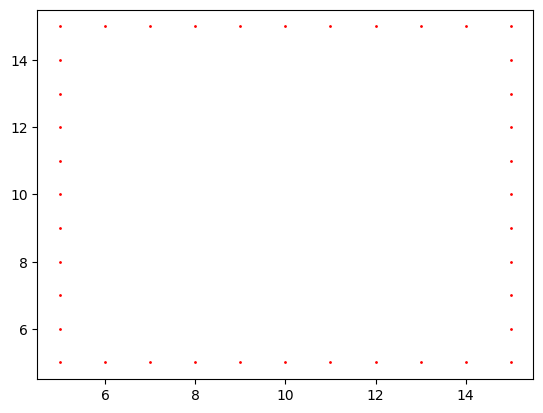

In [60]:

# Test the function
x_width = 20
y_height = 20
x1,y1,x2,y2=(5,5,15,15)

# Points inside the rectangle
target_region= np.array([[x, y] for x in range(x1+1, x2) for y in range(y1+1, y2)])

# Points outside the rectangle, bounded by max_width and max_height
source_region= np.array([[x, y] for x in range(x_width) for y in range(y_height)
                           if  (x1 <= x <= x2 and y1 <= y <= y2)])

image = np.zeros((256, 256), np.uint8) 

thickness = 1
contour = cv2.rectangle(image.copy(),[x1,y1],[x2,y2], 255, thickness) 

# Creating rectangle
thickness = -1
target_region = cv2.rectangle(image.copy(),[x1,y1],[x2,y2], 255, thickness) 
thickness = -1
source_region =np.array(cv2.bitwise_not(target_region))

# Displaying the image  
# plt.imshow(cv2.cvtColor(contour, cv2.COLOR_BGR2RGB))

temp=np.where(np.array(np.array(contour)==255,dtype=int)==1)
contour_indices = np.array(list(zip(temp[0],temp[1])))

temp=np.where(np.array(np.array(source_region)==255,dtype=int)==1)
source_indices = np.array(list(zip(temp[0],temp[1])))

temp=np.where(np.array(np.array(target_region)==255,dtype=int)==1)
target_indices = np.array(list(zip(temp[0],temp[1])))
plt.scatter(contour_indices[:,0], contour_indices[:,1], c='r', s=1)

grad_dir -2.356194490192345
normal -3.9269908169872414
pos 5 5
grad_x -765.0
grad_y -765.0
 -765.0


(3.0150757595082496,
 15.570710678118655,
 3.0150757595082496,
 15.570710678118655)

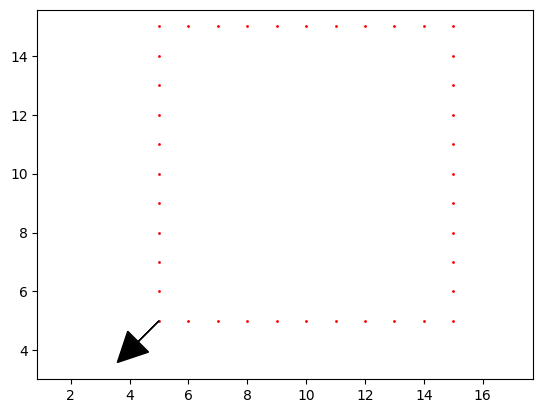

In [128]:

# Calculate the gradient in the x and y directions
grad_x = cv2.Sobel(source_region, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(source_region, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the direction of the gradient
gradient_direction = np.arctan2(grad_y, grad_x)

normal = (gradient_direction - np.pi / 2)
normal[contour_indices[13,0],contour_indices[13,1]]


index=0
print("grad_dir",gradient_direction[contour_indices[index,0],contour_indices[index,1]])
print("normal",normal[contour_indices[index,0],contour_indices[index,1]])
print("pos",contour_indices[index,0],contour_indices[index,1])
print("grad_x",grad_x[contour_indices[index,0],contour_indices[index,1]])
print("grad_y",grad_y[contour_indices[index,0],contour_indices[index,1]])
print("",grad_y[contour_indices[index,0],contour_indices[index,1]])
plt.scatter(contour_indices[:,0], contour_indices[:,1], c='r', s=1)
plt.arrow(contour_indices[index,0], contour_indices[index,1], np.cos(normal[contour_indices[index,0],contour_indices[index,1]]), -np.sin(normal[contour_indices[index,0],contour_indices[index,1]]), head_width=1, head_length=1, fc='k', ec='k')
plt.axis('equal')



In [133]:
# Calculate the Laplacian of the image
laplacian = cv2.Laplacian(source_region, cv2.CV_64F)

# Find the zero-crossings of the Laplacian to get the isophote
isophote = np.where(np.diff(np.sign(laplacian)))[0]

# Now, 'isophote' contains the indices of the isophote in the image
print(isophote)
print(source_region[isophote])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])